In [1]:
# Importing required packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

## Data for map

In [2]:
# Importing the shape file of assembly-constituencies
fp = "assembly-constituencies"
map_df = gpd.read_file(fp)
map_df = map_df[map_df['ST_NAME']=='MAHARASHTRA']
map_df = map_df[['AC_NAME', 'geometry']]
map_df.reset_index(drop=True,inplace=True)
map_df.head(3)




,AC_NAME,geometry
0,Akkalkuwa (ST),"POLYGON ((74.43880 22.02530, 74.44376 22.02279..."
1,Shahada (ST),"POLYGON ((74.49131 21.77939, 74.50158 21.78254..."
2,Melghat (ST),"POLYGON ((77.06580 21.71244, 77.07649 21.72016..."


In [3]:
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   AC_NAME   288 non-null    object  
 1   geometry  302 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.8+ KB


<Figure size 720x720 with 0 Axes>

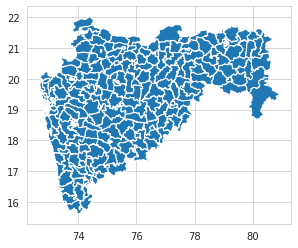

In [4]:
# Plot of the assembly-constituencies
plt.figure(figsize=(10,10))
map_df.plot()

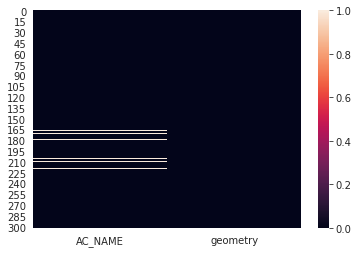

In [5]:
# It seems some of the names of the assembly-constituencies is missing!
Null_Values = map_df.isnull()
sns.heatmap(Null_Values)

In [6]:
# checking for null values
Null_Values = map_df.isnull().sum()
print(Null_Values)

AC_NAME     14
geometry     0
dtype: int64


In [7]:
# Exploring that region
# These 'none' values will checked if they are string or None type for dropping 
map_df['AC_NAME'][160:180]

160         Malad West
161           Dindoshi
162               None
163             Airoli
164           Goregaon
165           Ambegaon
166    Jogeshwari East
167               None
168            Versova
169       Bhandup West
170             Bhokar
171               None
172       Andheri East
173          Majalgaon
174       Andheri West
175         Chandivali
176           Vikhroli
177         Vile Parle
178             Panvel
179               None
Name: AC_NAME, dtype: object

In [8]:
print(type(map_df['AC_NAME'][162]))

<class 'NoneType'>


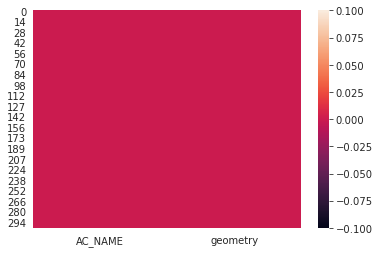

In [9]:
# The 'None' type rows are removed
map_df.dropna(inplace=True)
Null_Values = map_df.isnull()
sns.heatmap(Null_Values)

In [10]:
# index is reset
map_df.reset_index(drop=True,inplace=True)
map_df.head(50)

,AC_NAME,geometry
0,Akkalkuwa (ST),"POLYGON ((74.43880 22.02530, 74.44376 22.02279..."
1,Shahada (ST),"POLYGON ((74.49131 21.77939, 74.50158 21.78254..."
2,Melghat (ST),"POLYGON ((77.06580 21.71244, 77.07649 21.72016..."
3,Nandurbar (ST),"POLYGON ((74.36255 21.63173, 74.37504 21.62575..."
4,Shirpur (ST),"POLYGON ((74.97262 21.59618, 75.00372 21.58292..."
5,Ramtek,"POLYGON ((79.23091 21.71881, 79.23061 21.72244..."
6,Nawapur (ST),"POLYGON ((74.10053 21.44770, 74.11644 21.45242..."
7,Morshi,"POLYGON ((78.17621 21.50048, 78.17434 21.50801..."
8,Savner,"POLYGON ((79.01220 21.59951, 79.01377 21.59982..."
9,Gondiya,"POLYGON ((80.24830 21.62326, 80.25333 21.62488..."


In [11]:
# Cleaning the names of assembly constituencies
def text_process(names):
    semi_cleaned_names = [word for word in names.strip().lower().split() if word not in ['(st)','(sc)']] 
    #print(semi_cleaned_names)
    joined_cleaned_names = " ".join(semi_cleaned_names)
    #print(joined_cleaned_names)
    removed_st_names = joined_cleaned_names.replace("(st)","")
    fully_cleaned_names = removed_st_names.replace("(sc)","")
    #print(fully_cleaned_names)
    return fully_cleaned_names

In [12]:
text_process('Arjuni Morgaon(SC)')

'arjuni morgaon'

In [13]:
# The cleaned names
map_df['cleaned_names']=map_df['AC_NAME'].apply(text_process)
map_df = map_df[['cleaned_names','geometry']]   
map_df.head(3)

,cleaned_names,geometry
0,akkalkuwa,"POLYGON ((74.43880 22.02530, 74.44376 22.02279..."
1,shahada,"POLYGON ((74.49131 21.77939, 74.50158 21.78254..."
2,melghat,"POLYGON ((77.06580 21.71244, 77.07649 21.72016..."


In [14]:
# number of unique values
len(map_df['cleaned_names'].unique())

288

## Data for election winning parties

In [15]:
df_election = pd.read_excel('2-List of Successful Candidates.xlsx',names=np.array(['State','Constituency','Winner','Sex','Party','Symbol']))  
df_election.reset_index(drop=True)
df_election.head()

,State,Constituency,Winner,Sex,Party,Symbol
0,Maharashtra,Akkalkuwa,ADV. K. C. PADAVI,MALE,INC,Hand
1,Maharashtra,Shahada,Rajesh Udesing Padvi,MALE,BJP,Lotus
2,Maharashtra,Nandurbar,VIJAYKUMAR KRUSHNARAO GAVIT,MALE,BJP,Lotus
3,Maharashtra,Nawapur,Naik Shirishkumar Surupsing,MALE,INC,Hand
4,Maharashtra,Sakri,Manjula Tulshiram Gavit,FEMALE,IND,Telephone


In [16]:
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         288 non-null    object
 1   Constituency  288 non-null    object
 2   Winner        288 non-null    object
 3   Sex           288 non-null    object
 4   Party         288 non-null    object
 5   Symbol        288 non-null    object
dtypes: object(6)
memory usage: 13.6+ KB


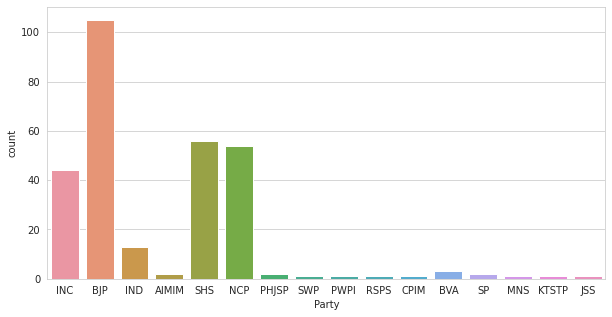

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Party',data=df_election,)

In [18]:
df_election['Party'].value_counts()

BJP      105
SHS       56
NCP       54
INC       44
IND       13
BVA        3
AIMIM      2
SP         2
PHJSP      2
JSS        1
CPIM       1
KTSTP      1
RSPS       1
MNS        1
SWP        1
PWPI       1
Name: Party, dtype: int64

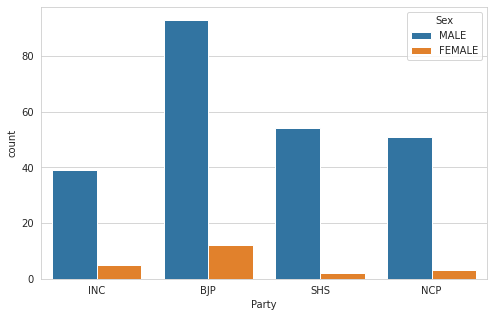

In [19]:
df_successful_party = df_election['Party'].value_counts() > 20
df_successful_party=df_successful_party[df_successful_party==True].index
Succ_parties = df_successful_party.values
df = df_election['Party'].apply(lambda x: x in Succ_parties)
plt.figure(figsize=(8,5))
sns.countplot(x = 'Party',data = df_election[df],hue='Sex')

In [20]:
df_election['Sex'].value_counts()
Percentage_of_women = 24/288*100
Percentage_of_women

8.333333333333332

In [21]:
df_election[df_election['Party']=='BJP']['Sex'].value_counts()
Percentage_of_women_BJP = (12/105)*100
Percentage_of_women_BJP

11.428571428571429

In [22]:
df_election[df_election['Party']=='INC']['Sex'].value_counts()
Percentage_of_women_INC = (5/44)*100
Percentage_of_women_INC

11.363636363636363

In [23]:
df_election[df_election['Party']=='NCP']['Sex'].value_counts()
Percentage_of_women_NCP = (3/54)*100
Percentage_of_women_NCP

5.555555555555555

In [24]:
df_election[df_election['Party']=='SHS']['Sex'].value_counts()
Percentage_of_women_SHS = 2/56*100
Percentage_of_women_SHS

3.571428571428571

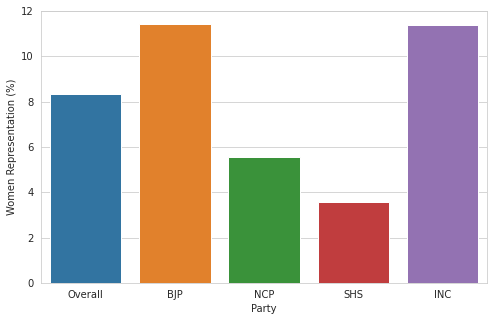

In [25]:
arr = np.array([Percentage_of_women,Percentage_of_women_BJP,Percentage_of_women_NCP,Percentage_of_women_SHS,Percentage_of_women_INC])
np.array(arr).shape
Women_representation = pd.DataFrame(data=arr,columns=['Women Representation (%)'],index=None)
Women_representation['Party'] = ['Overall','BJP','NCP','SHS','INC']
plt.figure(figsize=(8,5))
sns.barplot(y='Women Representation (%)',x='Party',data=Women_representation)


In [26]:
#Checking for null or none type values
df_election = df_election[['Constituency','Party']]
Null_values = df_election.isnull() 

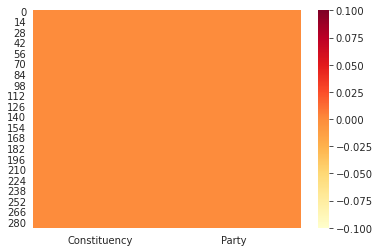

In [27]:
# It seems the data is complete!
sns.heatmap(Null_values,cmap='YlOrRd')

In [28]:
# Cleaning the names of assembly constituencies
df_election['Constituency']=df_election['Constituency'].str.lower()
df_election['Constituency']=df_election['Constituency'].str.strip()
# Checking if the first value from both DF match!
#df_election['Constituency'][0] == map_df['cleaned_names'][0]
#Checking the number of unique values
len(map_df['cleaned_names'].unique())

288

In [29]:
# Joining both DF with 'cleaned_names' column as index
merged = map_df.set_index('cleaned_names').join(df_election.set_index('Constituency'))
merged.head()
#merged['cleaned_names'].unique()

,geometry,Party
cleaned_names,,
akkalkuwa,"POLYGON ((74.43880 22.02530, 74.44376 22.02279...",INC
shahada,"POLYGON ((74.49131 21.77939, 74.50158 21.78254...",BJP
melghat,"POLYGON ((77.06580 21.71244, 77.07649 21.72016...",PHJSP
nandurbar,"POLYGON ((74.36255 21.63173, 74.37504 21.62575...",BJP
shirpur,"POLYGON ((74.97262 21.59618, 75.00372 21.58292...",BJP


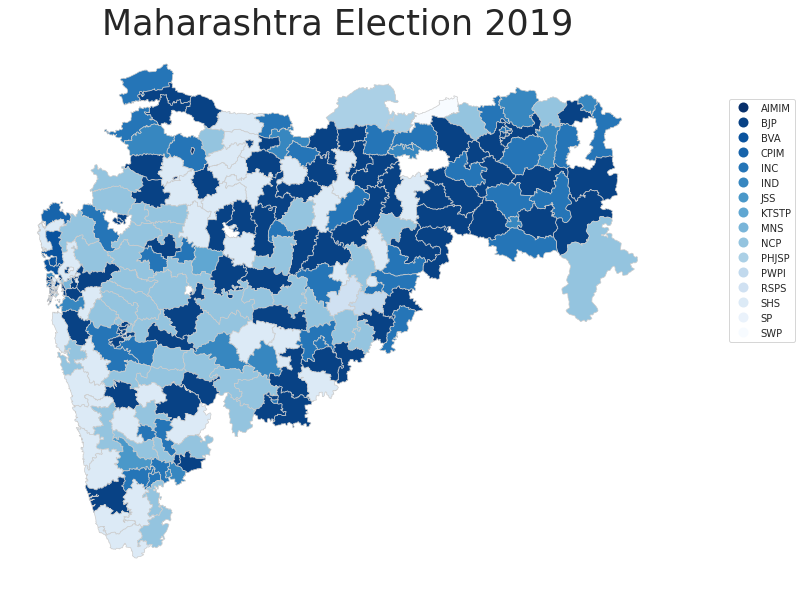

In [37]:
# Plotting the election results
fig, ax = plt.subplots(1,figsize=(15, 10))
ax.axis('off')
ax.set_title('Maharashtra Election 2019', fontdict={'fontsize': '35', 'fontweight' : '3'})
#color_map = plt.cm.get_cmap('Blues')
#reversed_color_map = color_map.reversed()
merged.plot(column='Party', cmap='Blues_r', linewidth=0.7, ax=ax, edgecolor='0.8', legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.7, 0.2, 0.2))
#plt.legend(fontsize=16)
#plt.savefig('Elections.pdf')
plt.show()

## Conclusion

### 1. Some of the blank spaces are from data deleted from map_dp due to missing assembly names!
### 2. The blank spaces are just silhouette left out from the colors of other constituencies.